## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Data

In [2]:
df = pd.read_excel(r'data/customer.xlsx')

## 3. EDA

### 3a. Description

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.sample(5).T

,99574,370675,356940,506844,148387
InvoiceNo,544776,569148,568061,579158,549235
StockCode,22081,22113,22385,22865,22442
Description,RIBBON REEL FLORA + FAUNA,GREY HEART HOT WATER BOTTLE,JUMBO BAG SPACEBOY DESIGN,HAND WARMER OWL DESIGN,GROW YOUR OWN FLOWERS SET OF 3
Quantity,1,4,1,12,2
InvoiceDate,2011-02-23 11:39:00,2011-09-30 15:52:00,2011-09-23 13:12:00,2011-11-28 13:53:00,2011-04-07 11:16:00
UnitPrice,3.29,4.25,2.08,2.1,7.95
CustomerID,NaN,16613.0,16910.0,17188.0,15530.0
Country,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom


In [5]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [6]:
df.shape

(541909, 8)

### 4a. Null Values

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### 4b. Unique Values

In [8]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## 5. Preprocessing

In [9]:
df.isnull().sum()/df.shape[0]*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

### 5a. Duplicate values

In [10]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

### 5b. Null values in Customer ID

- Check for null values for customer ID
- For visualization purposes fill null values with "unknown"/"unregistered" customers

In [11]:
null_inv = df[df['CustomerID'].isna()].InvoiceNo.unique().tolist()

In [12]:
df['CustomerID'].fillna("unknown", inplace=True)

In [13]:
df.query('~CustomerID.isna()')['CustomerID'] = df.query('~CustomerID.isna()')['CustomerID'].apply(lambda x: str(x)[:-2]).tolist()

In [14]:
df['Description'].fillna('no description', inplace=True)

## 6. Visualisations

In [31]:
df['month'] = df['InvoiceDate'].dt.month

In [33]:
df['Revenue'] = df['UnitPrice']*df['Quantity']

### 6a. Monthly Revenue

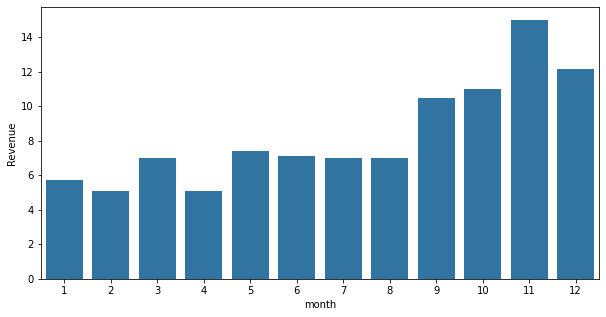

In [71]:
plt.figure(figsize=[10,5])
sns.barplot(
    data=(df.groupby('month')['Revenue'].sum()*100/df.Revenue.sum()).reset_index(), 
    x='month', y='Revenue'
)
plt.show()

### 6b. Monthly Transactions

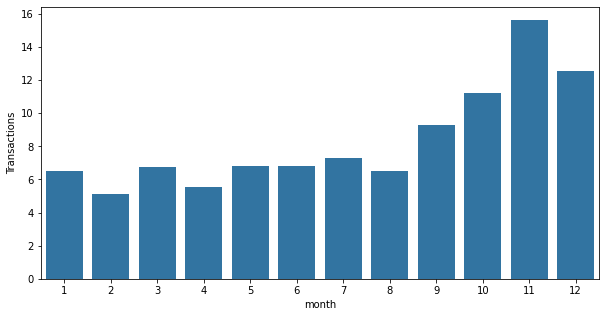

In [65]:
plt.figure(figsize=[10,5])
sns.barplot(
    data=(df.groupby('month')[
        'InvoiceNo'].count()*100/df['InvoiceNo'].count()).reset_index(), 
    x='month', y='InvoiceNo'
)
plt.ylabel(ylabel="Transactions")
plt.show()

### 6c. Countrywise Revenue

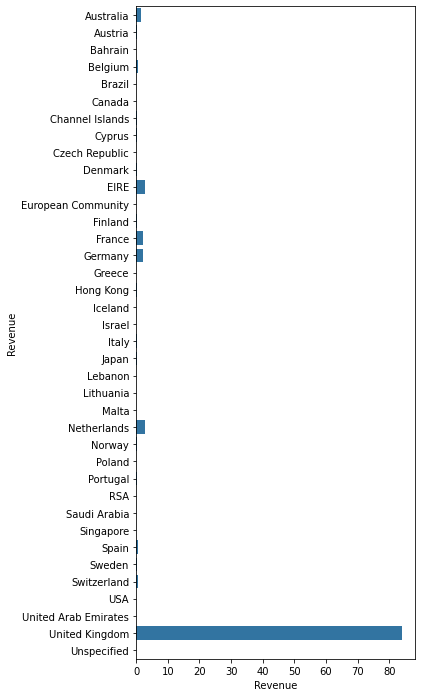

In [72]:
plt.figure(figsize=[5,12])
sns.barplot(
    data=(df.groupby('Country')[
        'Revenue'].sum()*100/df['Revenue'].sum()).reset_index(), 
    y='Country', x='Revenue'
)
plt.ylabel('Revenue')
plt.show()

### 6c. Countrywise Transactions

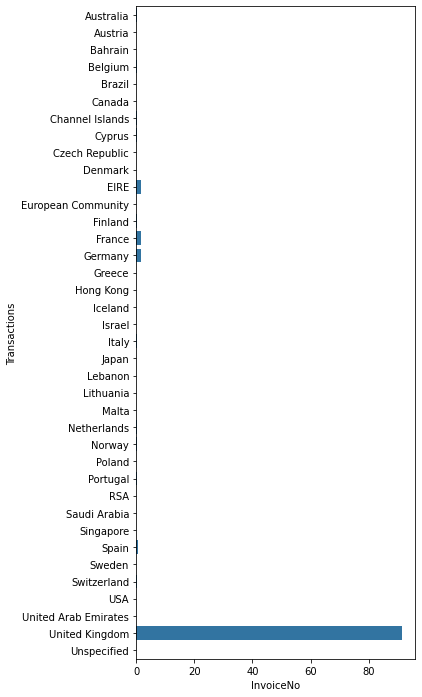

In [69]:
plt.figure(figsize=[5,12])
sns.barplot(
    data=(df.groupby('Country')[
        'InvoiceNo'].count()*100/df['InvoiceNo'].count()).reset_index(), 
    y='Country', x='InvoiceNo'
)
plt.ylabel('Transactions')
plt.show()

## 7. Analysis

### 7a. Lifetime Value (LTV)

In [15]:
ltv = df.query('CustomerID!="unknown"')

ltv['InvoiceNo'] = [str(i) for i in ltv['InvoiceNo']]

ltv['Status'] = ["Cancelled" if len(i)>6 else "Completed" for i in ltv['InvoiceNo']]

In [16]:
df_ltv = ltv.query('Status=="Completed"').groupby('CustomerID').apply(lambda s: pd.Series({
    'Revenue' : round(s['Revenue'].sum()),
    'Avg_revenue' : round(s['Revenue'].mean()),
    'Transactions' : s['InvoiceNo'].count(),
    'Retention_time' : (s['InvoiceDate'].max() - s['InvoiceDate'].min()).days
})).reset_index()

In [17]:
df_ltv['Retention_time'] = [1 if i==0 else i for i in df_ltv['Retention_time']]
df_ltv['Retention_years'] = round(df_ltv['Retention_time']/365, 3)
df_ltv['Retention_month'] = round(df_ltv['Retention_time']/30)

In [18]:
df_ltv.groupby('CustomerID').apply(lambda s: pd.Series({
    'CV': round((s['Revenue'].sum()/s['Transactions'].sum())*s['Transactions'].mean()),
    'CLTV': round((s['Revenue'].sum()/s['Transactions'].sum()*s['Transactions'].mean())*s['Retention_years'].mean())
}))

,CV,CLTV
CustomerID,,
12346.0,77184,232
12347.0,1182814,1182814
12348.0,418360,323392
12349.0,381818,1145
12350.0,12864,39
...,...,...
18280.0,2144,6
18281.0,2125,6
18282.0,6426,2076


In [19]:
df_ltv.head()

,CustomerID,Revenue,Avg_revenue,Transactions,Retention_time,Retention_years,Retention_month
0,12346.0,77184,77184,1,1,0.003,0.0
1,12347.0,1182814,1182814,182,365,1.000,12.0
2,12348.0,418360,418360,31,282,0.773,9.0
3,12349.0,381818,381818,73,1,0.003,0.0
4,12350.0,12864,12864,17,1,0.003,0.0


In [20]:
print("Customer Value :", round((df_ltv['Revenue'].sum()/df_ltv['Transactions'].sum())*df_ltv['Transactions'].mean()))
print('Customer Lifespan :', round(df_ltv['Retention_years'].mean(), 2), 'years or', round(df_ltv['Retention_month'].mean()), 'months')
print("CLTV :", round((df_ltv['Revenue'].sum()/df_ltv['Transactions'].sum()*df_ltv['Transactions'].mean())*df_ltv['Retention_years'].mean()))

Customer Value : 1999346
Customer Lifespan : 0.36 years or 4 months
CLTV : 716544


### 7b. Average Revenue Per User (ARPU)

In [21]:
print("ARPU :",round(df_ltv['Revenue'].sum()/df_ltv.shape[0]))

ARPU : 1999346


### 7c. Average Purchase Value

In [22]:
print('APV :', round(df_ltv['Revenue'].sum()/df_ltv['Transactions'].sum()))

APV : 21801


### 7d. Average Purchase Frequency Rate

In [23]:
print('APFR :', round(df_ltv['Transactions'].sum()/df_ltv.shape[0]))

APFR : 92


### 7e. Repeat Purchase Rate (RPR)

In [24]:
print('RPR :', round(df_ltv.query('Retention_time>1')['CustomerID'].count()/df_ltv['CustomerID'].count(), 2))

RPR : 0.64
